<div style="background-color: white; color: black; font-family: 'Times New Roman', serif; padding: 50px; max-width: 450px; margin: auto; border: 1px solid #ccc; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
  <div align="center">
    <img src="Imagenes/ugr_escudo_sin.png" alt="Escudo UGR" style="height: 120px;"><br><br>
    <h2 style="margin-bottom: 0;">Universidad de Granada</h2>
    <h3 style="margin-top: 0;">TRABAJO FIN DE GRADO</h3>
    <p style="font-variant: small-caps; font-size: 14px;">
      Doble Grado en Ingeniería Informática y Administración y Dirección de Empresas
    </p>
    <hr style="width: 60%; border: 1px solid black;">
    <h2 style="font-size: 20px;">
      Análisis y Optimización de<br>
      Rutas Aéreas Comerciales<br>
      mediante Ciencia de Datos
    </h2>
    <hr style="width: 60%; border: 1px solid black;">
    <br>
    <p><strong>Autor</strong><br>José Antonio Fernández Aranda</p>
    <p><strong>Director</strong><br>Jorge Casillas Barranquero</p>
    <p><strong>Análisis Turístico</strong><br></p>
    <br><br>
    <div style="display: flex; justify-content: center; align-items: center; gap: 80px; flex-wrap: wrap;">
      <img src="https://etsiit.ugr.es/sites/centros/etsiit/public/template-extra/etsiit-logo.png" alt="Logo ETSIIT" style="height: 100px;">
      <img src="Imagenes/logo_decsai.png" alt="Logo DECSAI" style="height: 100px;">
    </div>
    <br>
    <p style="font-size: 14px;">
      Escuela Técnica Superior de Ingenierías Informática y de Telecomunicación<br>
      —<br>
      Granada, a 9 de junio de 2025
    </p>
  </div>
</div>

### Importación de Librerias

In [40]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")
plt.style.use('ggplot')




In [41]:
# %% 📂 Cargar archivos
vuelos_1 = pd.read_excel("Vuelos_datos/vuelos_con_duracion_CALCULADO.xlsx")
vuelos_2 = pd.read_excel("Vuelos_datos/3_vuelos_con_duracion_CALCULADO.xlsx")
indicadores = pd.read_csv("Datos_turisticos.csv")

# Vista previa
print("Vuelos 1:")
display(vuelos_1.head())

print("Vuelos 2:")
display(vuelos_2.head())

print("Indicadores Turísticos:")
display(indicadores.head())




Vuelos 1:


,Ident,Tipo,Origen,Destino,Salida,Llegada estimada,Aerolínea,Fecha salida,Hora salida,Zona horaria salida,Fecha llegada,Hora llegada,Zona horaria llegada,Salida datetime,Llegada datetime,Duración (min),Duración (hh:mm)
0,CSN301,B789,Int'l Cantón Baiyun (CAN / ZGGG),Int'l Kingsford Smith (SYD / YSSY),mar 08:35AM CST,mar 07:16PM AEST,CSN,mar,08:35AM,CST,mar,07:16PM,AEST,2025-03-20 13:35:00,2025-03-20 08:16:00,-319.0,-6:41
1,CSN303,B789,Int'l Cantón Baiyun (CAN / ZGGG),Londres-Heathrow (LHR / EGLL),mar 02:16PM CST,mar 07:24PM BST,CSN,mar,02:16PM,CST,mar,07:24PM,BST,2025-03-20 19:16:00,2025-03-20 19:24:00,8.0,00:08
2,CSN3038,A21N,Int'l Soekarno-Hatta (CGK / WIII),Int'l Cantón Baiyun (CAN / ZGGG),mar 01:38PM WIB,mar 07:23PM CST,CSN,mar,01:38PM,WIB,mar,07:23PM,CST,2025-03-20 06:38:00,2025-03-21 00:23:00,1065.0,17:45
3,CSN3039,B38M,Int'l Cantón Baiyun (CAN / ZGGG),Int'l de Singapur (SIN / WSSS),mar 01:14PM CST,mar 04:53PM +08,CSN,mar,01:14PM,CST,mar,04:53PM,+08,2025-03-20 18:14:00,2025-03-20 16:53:00,-81.0,-2:39
4,CSN304,B789,Londres-Heathrow (LHR / EGLL),Int'l Cantón Baiyun (CAN / ZGGG),lun 10:12PM BST,mar 04:12PM CST,CSN,lun,10:12PM,BST,mar,04:12PM,CST,2025-03-20 22:12:00,2025-03-20 21:12:00,-60.0,-1:00


Vuelos 2:


,Ident,Tipo,Origen,Destino,Salida,Llegada estimada,Aerolínea,Fecha salida,Hora salida,Zona horaria salida,Fecha llegada,Hora llegada,Zona horaria llegada,Salida datetime,Llegada datetime,Duración (min),Duración (hh:mm)
0,DAL1002,B739,El Paso Intl (KELP),Int'l Hartsfield-Jackson (KATL),mié 01:16PM MDT,mié 05:57PM EDT,DAL,mié,01:16PM,MDT,mié,05:57PM,EDT,2025-03-20 13:16:00,2025-03-20 21:57:00,521.0,08:41
1,DAL1004,B739,Int'l de Albuquerque Sunport (KABQ),Int'l Hartsfield-Jackson (KATL),mié 11:33AM MDT,mié 04:02PM EDT,DAL,mié,11:33AM,MDT,mié,04:02PM,EDT,2025-03-20 11:33:00,2025-03-20 20:02:00,509.0,08:29
2,DAL1005,B739,Int'l Hartsfield-Jackson (KATL),Int'l de Detroit (KDTW),mié 03:21PM EDT,mié 04:55PM EDT,DAL,mié,03:21PM,EDT,mié,04:55PM,EDT,2025-03-20 19:21:00,2025-03-20 20:55:00,94.0,01:34
3,DAL1012,A320,Int'l de Detroit (KDTW),Int'l de Austin-Bergstrom (KAUS),mié 03:19PM EDT,mié 04:59PM CDT,DAL,mié,03:19PM,EDT,mié,04:59PM,CDT,2025-03-20 19:19:00,2025-03-20 21:59:00,160.0,02:40
4,DAL1013,B712,Int'l Hartsfield-Jackson (KATL),Pensacola Intl (KPNS),mié 03:03PM EDT,mié 02:49PM CDT,DAL,mié,03:03PM,EDT,mié,02:49PM,CDT,2025-03-20 19:03:00,2025-03-20 19:49:00,46.0,00:46


Indicadores Turísticos:


,pais,codigo,anio,llegadas_turistas,ingresos_turisticos_usd,gasto_turismo_rel_pib,pib_total_usd
0,España,ESP,2015,70682867,1.141843e+11,14.773882,1.205344e+13
1,España,ESP,2016,40788921,2.040735e+10,1.632630,1.735029e+13
2,España,ESP,2017,36632483,1.885828e+10,13.192325,1.316949e+12
3,España,ESP,2018,18953367,1.002282e+11,4.640613,3.800134e+12
4,España,ESP,2019,81893497,6.392126e+10,8.922928,5.966337e+12


In [42]:
# Unificar datasets de vuelos
vuelos = pd.concat([vuelos_1, vuelos_2], ignore_index=True)

# Asegurarse de que las fechas estén en formato datetime
vuelos['Salida datetime'] = pd.to_datetime(vuelos['Salida datetime'], errors='coerce')
vuelos['Llegada datetime'] = pd.to_datetime(vuelos['Llegada datetime'], errors='coerce')

# Normalizar nombres de columnas del dataset turístico (por si hay inconsistencias)
indicadores.columns = indicadores.columns.str.lower().str.strip()

# Conversión de país a mayúsculas para facilitar joins posteriores
indicadores['pais'] = indicadores['pais'].str.upper()

# Verificar valores nulos
print("Nulos en vuelos:")
print(vuelos.isnull().sum())

print("\nNulos en indicadores:")
print(indicadores.isnull().sum())




Nulos en vuelos:
Ident                      0
Tipo                     198
Origen                     0
Destino                  720
Salida                     0
Llegada estimada         723
Aerolínea                  0
Fecha salida               0
Hora salida                0
Zona horaria salida        0
Fecha llegada            723
Hora llegada             723
Zona horaria llegada     723
Salida datetime            0
Llegada datetime         723
Duración (min)          2126
Duración (hh:mm)        2126
dtype: int64

Nulos en indicadores:
pais                       0
codigo                     0
anio                       0
llegadas_turistas          0
ingresos_turisticos_usd    0
gasto_turismo_rel_pib      0
pib_total_usd              0
dtype: int64


In [46]:
# Estandariza los nombres de columna a minúsculas sin espacios
vuelos.columns = vuelos.columns.str.lower().str.strip()
indicadores.columns = indicadores.columns.str.lower().str.strip()


In [47]:
# Extraer solo el nombre del aeropuerto (sin código entre paréntesis)
vuelos['destino_limpio'] = vuelos['destino'].str.extract(r'([^\(]+)').iloc[:, 0].str.strip()


In [48]:
# Extraer el año desde la columna de datetime de salida
vuelos['anio'] = vuelos['salida datetime'].dt.year


In [66]:
# Diccionario básico de destinos limpios a países
mapa_destino_pais = {
    "Int'l John F. Kennedy": "ESTADOS UNIDOS",
    "Int'l de Los Ángeles": "ESTADOS UNIDOS",
    "Int'l Toronto Pearson": "CANADÁ",
    "Int'l de Dubái": "EMIRATOS ÁRABES UNIDOS",
    "Int'l de Kuala Lumpur": "MALASIA",
    "Int'l de Hong Kong": "CHINA",
    "Int'l Chicago-O'Hare": "ESTADOS UNIDOS",
    "Madrid-Barajas": "ESPAÑA",
    "Istanbul Airport": "TURQUÍA",
    "Int'l Suvarnabhumi": "TAILANDIA",
    "París-Charles de Gaulle": "FRANCIA",
    "Hamad Int'l": "CATAR",
    "Int'l de Shanghái-Pudong": "CHINA",
    "Int'l Indira Gandhi": "INDIA",
    "Ámsterdam-Schiphol": "PAÍSES BAJOS",
    "Int'l de Seattle-Tacoma": "ESTADOS UNIDOS",
    "Int'l de Dallas-Fort Worth": "ESTADOS UNIDOS",
    "Int'l de Orlando": "ESTADOS UNIDOS",
    "Int'l Libertad de Newark": "ESTADOS UNIDOS",
    "Int'l de Miami": "ESTADOS UNIDOS",
    "Int'l de Narita": "JAPÓN",
    "Int'l de São Paulo-Guarulhos": "BRASIL",
    "Int'l Logan": "ESTADOS UNIDOS",
    "Int'l de Taiwán Taoyuan": "TAIWÁN",
    "Fráncfort del Meno": "ALEMANIA",
    "Int'l Ted Stevens Anchorage": "ESTADOS UNIDOS",
    "Int'l Pierre Elliott Trudeau": "CANADÁ",
    "Int'l de Tokio": "JAPÓN",
    "Int'l Washington-Dulles": "ESTADOS UNIDOS",
    "Intercontinental George Bush": "ESTADOS UNIDOS",
    "Londres-Gatwick": "REINO UNIDO",
    "Int'l de San Francisco": "ESTADOS UNIDOS",
    "Int'l Rey Abdulaziz": "ARABIA SAUDITA",
    "Int'l Ninoy Aquino": "FILIPINAS",
    "Varsovia-Frédéric Chopin": "POLONIA",
    "Lisboa": "PORTUGAL",
    "Int'l El Dorado": "COLOMBIA",
    "Int'l Rey Khalid": "ARABIA SAUDITA",
    "Copenhague-Kastrup": "DINAMARCA",
    "Viena": "AUSTRIA",
    "Barcelona": "ESPAÑA",
    "Int'l de Pekín": "CHINA",
    "Int'l de Melbourne": "AUSTRALIA",
    "Int'l de la Ciudad de México": "MÉXICO",
    "Int'l de El Cairo": "EGIPTO",
    "Int'l de Vancouver": "CANADÁ",
    "Int'l de Filadelfia": "ESTADOS UNIDOS",
    "Int'l Chhatrapati Shivaji": "INDIA",
    "Int'l Ben Gurión": "ISRAEL",
    "Int'l Sky Harbor": "ESTADOS UNIDOS"
}

# Crear la columna 'pais' mapeando desde destino_limpio
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [67]:
# Ordenar y quedarnos con el último año por país
indicadores_ultimos = indicadores.sort_values('anio').drop_duplicates('pais', keep='last')


In [68]:
# Merge entre vuelos (sin filtrar por año) y el indicador turístico más reciente por país
vuelos_completo = vuelos.merge(
    indicadores_ultimos,
    how='left',
    on='pais'
)


In [69]:
# ¿Cuántos vuelos tienen datos turísticos después del merge por país?
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)

print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 1342 de 7948 (16.88%)


In [70]:
# Ver cuántos vuelos tienen un país asignado y cuántos no
asignados = vuelos['pais'].notnull().sum()
no_asignados = vuelos['pais'].isnull().sum()

print(f"Vuelos con país asignado: {asignados}")
print(f"Vuelos sin país asignado: {no_asignados}")


Vuelos con país asignado: 2409
Vuelos sin país asignado: 5539


In [71]:
# Ver destinos limpios que no tienen país asignado
destinos_sin_pais = vuelos[vuelos['pais'].isnull()]['destino_limpio'].value_counts().head(50)
print(destinos_sin_pais)


destino_limpio
Int'l de Incheon                        128
Londres-Heathrow                         95
Int'l de Singapur                        74
Int'l Hartsfield-Jackson                 57
Int'l Kingsford Smith                    57
Int'l de Kansai                          30
Brisbane                                 30
Int'l McCarran                           29
Int'l de Tocumen                         29
Int'l Comodoro Arturo Merino Benítez     29
Bruselas-Zaventem                        28
Int'l de Zúrich                          27
Int'l de Denver                          27
Dublín                                   27
Int'l de Gimhae                          26
Málaga                                   26
Oslo-Gardermoen                          26
Int'l de Detroit                         26
Int'l Fort Lauderdale-Hollywood          25
Antalya                                  25
Int'l de Abu Dabi                        25
Int'l de Moscú-Sheremétievo              24
Int'l de Tan Son 

In [72]:
# Merge por país con los últimos indicadores turísticos disponibles
vuelos_completo = vuelos.merge(
    indicadores_ultimos,
    how='left',
    on='pais'
)


In [73]:
# ¿Cuántos vuelos tienen ahora datos turísticos?
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 1342 de 7948 (16.88%)


In [74]:
mapa_destino_pais.update({
    "Int'l de Incheon": "COREA DEL SUR",
    "Londres-Heathrow": "REINO UNIDO",
    "Int'l de Singapur": "SINGAPUR",
    "Int'l Hartsfield-Jackson": "ESTADOS UNIDOS",
    "Int'l Kingsford Smith": "AUSTRALIA",
    "Int'l de Kansai": "JAPÓN",
    "Brisbane": "AUSTRALIA",
    "Int'l McCarran": "ESTADOS UNIDOS",
    "Int'l de Tocumen": "PANAMÁ",
    "Int'l Comodoro Arturo Merino Benítez": "CHILE",
    "Bruselas-Zaventem": "BÉLGICA",
    "Int'l de Zúrich": "SUIZA",
    "Int'l de Denver": "ESTADOS UNIDOS",
    "Dublín": "IRLANDA",
    "Int'l de Gimhae": "COREA DEL SUR",
    "Málaga": "ESPAÑA",
    "Oslo-Gardermoen": "NORUEGA",
    "Int'l de Detroit": "ESTADOS UNIDOS",
    "Int'l Fort Lauderdale-Hollywood": "ESTADOS UNIDOS",
    "Antalya": "TURQUÍA",
    "Int'l de Abu Dabi": "EMIRATOS ÁRABES UNIDOS",
    "Int'l de Moscú-Sheremétievo": "RUSIA",
    "Int'l de Tan Son Nhat": "VIETNAM",
    "París-Orly": "FRANCIA",
    "Int'l de Auckland": "NUEVA ZELANDA",
    "Estocolmo-Arlanda": "SUECIA",
    "Int'l de Munich-Franz Josef Strauss": "ALEMANIA",
    "Shenzhen Bao'an Int'l": "CHINA",
    "Don Muang Int'l": "TAILANDIA",
    "Helsinki-Vantaa": "FINLANDIA",
    "Int'l Eleftherios Venizelos": "GRECIA",
    "Int'l de Charlotte-Douglas": "ESTADOS UNIDOS",
    "Roma-Fiumicino": "ITALIA",
    "Int'l de Honolulu": "ESTADOS UNIDOS",
    "Chengdu Tianfu Int'l": "CHINA",
    "Int'l de San Diego": "ESTADOS UNIDOS",
    "Púlkovo": "RUSIA",
    "Jorge Chávez Int'l": "PERÚ",
    "Int'l de Nội Bài": "VIETNAM",
    "Milán-Malpensa": "ITALIA",
    "Int'l de Bucarest-Henri Coandă": "RUMANIA",
    "Int'l de Guadalajara": "MÉXICO",
    "Budapest-Ferihegy": "HUNGRÍA",
    "Mánchester": "REINO UNIDO",
    "Int'l de Ginebra": "SUIZA",
    "Berlín-Schönefeld": "ALEMANIA",
    "Hangzhou Xiaoshan Int'l": "CHINA",
    "Int'l de Campinas": "BRASIL",
    "Hamburgo": "ALEMANIA"
})


In [75]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [76]:
vuelos_completo = vuelos.merge(
    indicadores_ultimos,
    how='left',
    on='pais'
)


In [77]:
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 1971 de 7948 (24.80%)


In [78]:
mapa_destino_pais.update({
    "Int'l de Boston": "ESTADOS UNIDOS",
    "Int'l de Houston-Hobby": "ESTADOS UNIDOS",
    "Int'l de Baltimore-Washington": "ESTADOS UNIDOS",
    "Int'l de Las Vegas": "ESTADOS UNIDOS",
    "Int'l de Portland": "ESTADOS UNIDOS",
    "Int'l de Salt Lake City": "ESTADOS UNIDOS",
    "Int'l de Kansas City": "ESTADOS UNIDOS",
    "Int'l de Minneapolis-Saint Paul": "ESTADOS UNIDOS",
    "Int'l de Tampa": "ESTADOS UNIDOS",
    "Int'l de Raleigh-Durham": "ESTADOS UNIDOS",
    "Int'l de Cincinnati": "ESTADOS UNIDOS",
    "Int'l de San Juan": "PUERTO RICO",
    "Int'l de Montevideo": "URUGUAY",
    "Int'l de Lima": "PERÚ",
    "Int'l de Quito": "ECUADOR",
    "Int'l de Santiago de Chile": "CHILE",
    "Int'l de Buenos Aires-Ezeiza": "ARGENTINA",
    "Int'l de Bogotá": "COLOMBIA",
    "Int'l de Caracas": "VENEZUELA",
    "Int'l de Panamá": "PANAMÁ",
    "Int'l de La Habana": "CUBA",
    "Int'l de San José": "COSTA RICA",
    "Int'l de Punta Cana": "REPÚBLICA DOMINICANA",
    "Int'l de Santo Domingo": "REPÚBLICA DOMINICANA",
    "Int'l de Nassau": "BAHAMAS",
    "Int'l de Aruba": "ARUBA",
    "Int'l de Reykjavik-Keflavik": "ISLANDIA",
    "Int'l de Praga": "CHEQUIA",
    "Int'l de Zagreb": "CROACIA",
    "Int'l de Sofía": "BULGARIA",
    "Int'l de Riga": "LETONIA",
    "Int'l de Vilna": "LITUANIA",
    "Int'l de Belgrado": "SERBIA",
    "Int'l de Ljubljana": "ESLOVENIA",
    "Int'l de Bratislava": "ESLOVAQUIA",
    "Int'l de Tallin": "ESTONIA"
})


In [79]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [80]:
vuelos_completo = vuelos.merge(
    indicadores_ultimos,
    how='left',
    on='pais'
)


In [81]:
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 2075 de 7948 (26.11%)


In [82]:
mapa_destino_pais.update({
    "Int'l de Anchorage": "ESTADOS UNIDOS",
    "Int'l de Phoenix-Mesa Gateway": "ESTADOS UNIDOS",
    "Int'l de San José del Cabo": "MÉXICO",
    "Int'l de Puerto Vallarta": "MÉXICO",
    "Int'l de Cancún": "MÉXICO",
    "Int'l de Monterrey": "MÉXICO",
    "Int'l de Tijuana": "MÉXICO",
    "Int'l de Cozumel": "MÉXICO",
    "Int'l de Mérida": "MÉXICO",
    "Int'l de Mazatlán": "MÉXICO",
    "Int'l de Liberia": "COSTA RICA",
    "Int'l de Belice": "BELICE",
    "Int'l de Managua": "NICARAGUA",
    "Int'l de Tegucigalpa": "HONDURAS",
    "Int'l de San Salvador": "EL SALVADOR",
    "Int'l de Port-au-Prince": "HAITÍ",
    "Int'l de Kingston": "JAMAICA",
    "Int'l de George Town": "ISLAS CAIMÁN",
    "Int'l de Providenciales": "ISLAS TURCAS Y CAICOS",
    "Int'l de Bridgetown": "BARBADOS",
    "Int'l de Fort-de-France": "MARTINICA",
    "Int'l de Pointe-à-Pitre": "GUADALUPE",
    "Int'l de Oranjestad": "ARUBA",
    "Int'l de Willemstad": "CURAZAO",
    "Int'l de Philipsburg": "SINT MAARTEN",
    "Int'l de Larnaca": "CHIPRE",
    "Int'l de Tiflis": "GEORGIA",
    "Int'l de Bakú": "AZERBAIYÁN",
    "Int'l de Almatý": "KAZAJISTÁN",
    "Int'l de Taskent": "UZBEKISTÁN",
    "Int'l de Ereván": "ARMENIA"
})


In [83]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [84]:
vuelos_completo = vuelos.merge(
    indicadores_ultimos,
    how='left',
    on='pais'
)


In [85]:
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 2087 de 7948 (26.26%)


In [87]:
# Asegurar que la columna 'destino_limpio' está generada
vuelos['destino_limpio'] = vuelos['destino'].str.extract(r'([^\(]+)').iloc[:, 0].str.strip()


In [92]:
# Ver los 50 destinos más frecuentes sin país asignado
destinos_faltantes = vuelos[vuelos['pais'].isnull()]['destino_limpio'].value_counts().reset_index()
destinos_faltantes.columns = ['destino_limpio', 'frecuencia']

# Mostrar tabla
print(destinos_faltantes.head(50))


                           destino_limpio  frecuencia
0                     Int'l Cantón Baiyun          22
1                            Colonia/Bonn          19
2                       Palma de Mallorca          19
3                      Int'l de Bangalore          18
4                        Int'l Mohammed V          18
5                        Int'l de Calgary          18
6                                Alicante          17
7                      Xiamen Gaoqi Int'l          17
8                Int'l Ministro Pistarini          17
9                            Kuwait Int'l          17
10                        Int'l de Galeão          17
11                   Xi'an Xianyang Int'l          16
12                   Int'l Soekarno-Hatta          16
13                      Int'l de Edmonton          16
14                              LaGuardia          16
15                   Ngurah Rai/Bali Intl          15
16                       Int'l de Chennai          15
17                    São Pa

In [93]:
mapa_destino_pais.update({
    "Int'l Cantón Baiyun": "CHINA",
    "Colonia/Bonn": "ALEMANIA",
    "Palma de Mallorca": "ESPAÑA",
    "Int'l de Bangalore": "INDIA",
    "Int'l Mohammed V": "MARRUECOS",
    "Int'l de Calgary": "CANADÁ",
    "Alicante": "ESPAÑA",
    "Xiamen Gaoqi Int'l": "CHINA",
    "Int'l Ministro Pistarini": "ARGENTINA",
    "Kuwait Int'l": "KUWAIT",
    "Int'l de Galeão": "BRASIL",
    "Xi'an Xianyang Int'l": "CHINA",
    "Int'l Soekarno-Hatta": "INDONESIA",
    "Int'l de Edmonton": "CANADÁ",
    "LaGuardia": "ESTADOS UNIDOS",
    "Ngurah Rai/Bali Intl": "INDONESIA",
    "Int'l de Chennai": "INDIA",
    "São Paulo-Congonhas": "BRASIL",
    "Londres-Stansted": "REINO UNIDO",
    "Beijing Daxing International Airport": "CHINA",
    "Int'l Tancredo Neves": "BRASIL",
    "Int'l General Abelardo L. Rodríguez": "MÉXICO",
    "Londres-Luton": "REINO UNIDO",
    "Cracovia-Juan Pablo II": "POLONIA",
    "Int'l de Austin-Bergstrom": "ESTADOS UNIDOS",
    "Nashville Intl": "ESTADOS UNIDOS",
    "Int'l de Keflavík": "ISLANDIA",
    "Basilea-Mulhouse": "SUIZA",
    "Int'l de Dammam-Rey Fahd": "ARABIA SAUDITA",
    "Venecia": "ITALIA",
    "Int'l de Bahréin": "BAHRÉIN",
    "Nápoles-Capodichino": "ITALIA",
    "Sofía": "BULGARIA",
    "Praga": "CHEQUIA",
    "OR Tambo Int'l": "SUDÁFRICA",
    "Valencia": "ESPAÑA",
    "Int'l de Düsseldorf": "ALEMANIA",
    "Int'l de Memphis": "ESTADOS UNIDOS",
    "Int'l de Sharjah": "EMIRATOS ÁRABES UNIDOS",
    "Fukuoka": "JAPÓN",
    "Perth": "AUSTRALIA",
    "Stuttgart Echterdingen": "ALEMANIA",
    "Int'l de Indianápolis": "ESTADOS UNIDOS",
    "Int'l de Cincinnati/Kentucky Norte": "ESTADOS UNIDOS",
    "Int'l Luis Muñoz Marín": "PUERTO RICO",
    "Int'l Sabiha Gökçen": "TURQUÍA",
    "Birmingham Int'l": "REINO UNIDO",
    "Int'l Presidente Juscelino Kubitschek": "BRASIL",
    "Int'l de Moscú-Vnúkovo": "RUSIA",
    "Nacional Ronald Reagan de Washington": "ESTADOS UNIDOS"
})


In [94]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [95]:
vuelos_completo = vuelos.merge(indicadores_ultimos, how='left', on='pais')


In [96]:
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 2497 de 7948 (31.42%)


In [97]:
vuelos[vuelos['pais'].isnull()]['destino_limpio'].value_counts().head(50)


destino_limpio
Int'l de Moscú-Domodédovo          11
Marrakech-Menara                   11
Faro                               11
Shahjalal International Airport    11
Int'l de Palm Beach                11
Teterboro                          11
Bilbao                             11
Mactan-Cebu Int'l                  11
Int'l de Chongqing Jiangbei        11
Int'l Bandaranaike                 11
Krasnoyarsk Yemelyanovo            10
Int'l Niza Costa Azul              10
Int'l Jomo Kenyatta                10
Nagoya-Chubu Centrair              10
Int'l de Shanghai Hongqiao         10
Int'l de El Salvador               10
Int'l Midway                       10
Gran Canaria                       10
Int'l de Ürümqi                    10
Sanya Phoenix Int'l                 9
Toulouse-Blagnac                    9
Int'l Orlando Sanford               9
Int'l de Sacramento                 9
Sevilla                             9
Tenerife Sur                        9
Cochin Int'l                       

In [98]:
mapa_destino_pais.update({
    "Int'l de Moscú-Domodédovo": "RUSIA",
    "Marrakech-Menara": "MARRUECOS",
    "Faro": "PORTUGAL",
    "Shahjalal International Airport": "BANGLADESH",
    "Int'l de Palm Beach": "ESTADOS UNIDOS",
    "Teterboro": "ESTADOS UNIDOS",
    "Bilbao": "ESPAÑA",
    "Mactan-Cebu Int'l": "FILIPINAS",
    "Int'l de Chongqing Jiangbei": "CHINA",
    "Int'l Bandaranaike": "SRI LANKA",
    "Krasnoyarsk Yemelyanovo": "RUSIA",
    "Int'l Niza Costa Azul": "FRANCIA",
    "Int'l Jomo Kenyatta": "KENIA",
    "Nagoya-Chubu Centrair": "JAPÓN",
    "Int'l de Shanghai Hongqiao": "CHINA",
    "Int'l de El Salvador": "EL SALVADOR",
    "Int'l Midway": "ESTADOS UNIDOS",
    "Gran Canaria": "ESPAÑA",
    "Int'l de Ürümqi": "CHINA",
    "Sanya Phoenix Int'l": "CHINA",
    "Toulouse-Blagnac": "FRANCIA",
    "Int'l Orlando Sanford": "ESTADOS UNIDOS",
    "Int'l de Sacramento": "ESTADOS UNIDOS",
    "Sevilla": "ESPAÑA",
    "Tenerife Sur": "ESPAÑA",
    "Cochin Int'l": "INDIA",
    "Manchester Boston Rgnl": "ESTADOS UNIDOS",
    "Kunming Changshui Int'l": "CHINA",
    "Marsella Provenza": "FRANCIA",
    "William P. Hobby": "ESTADOS UNIDOS",
    "Christchurch Int'l": "NUEVA ZELANDA",
    "Belgrado-Nikola Tesla": "SERBIA",
    "Oporto": "PORTUGAL",
    "Tallin": "ESTONIA",
    "Int'l de Seeb": "OMÁN",
    "Kahului": "ESTADOS UNIDOS",
    "Dallas Love Fld": "ESTADOS UNIDOS",
    "Int'l de Gimpo": "COREA DEL SUR",
    "Int'l Queen Alia": "JORDANIA",
    "Int'l de Ottawa": "CANADÁ",
    "Adler-Sochi Int'l": "RUSIA",
    "Koltsovo Int'l": "RUSIA",
    "Lhasa Gonggar": "CHINA",
    "Milán-Linate": "ITALIA",
    "Int'l de Guarapes": "BRASIL",
    "Int'l de Lárnaca": "CHIPRE",
    "Charleston Intl/AFB": "ESTADOS UNIDOS",
    "Int'l de Jeju": "COREA DEL SUR",
    "Changsha Huanghua Int'l": "CHINA",
    "Bob Hope": "ESTADOS UNIDOS"
})


In [99]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)


In [100]:
vuelos_completo = vuelos.merge(indicadores_ultimos, how='left', on='pais')


In [101]:
con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 2755 de 7948 (34.66%)


In [104]:
mapa_destino_pais.update({
    "Int'l de Pafos": "CHIPRE",
    "Long Beach": "ESTADOS UNIDOS",
    "Burbank": "ESTADOS UNIDOS",
    "Int'l de Des Moines": "ESTADOS UNIDOS",
    "Santa Ana-John Wayne": "ESTADOS UNIDOS",
    "Int'l de Raleigh": "ESTADOS UNIDOS",
    "Palm Springs Intl": "ESTADOS UNIDOS",
    "Santo Domingo": "REPÚBLICA DOMINICANA",
    "Búfalo-Niagara": "ESTADOS UNIDOS",
    "Boise Air Terminal": "ESTADOS UNIDOS",
    "Knoxville McGhee Tyson": "ESTADOS UNIDOS",
    "Savannah/Hilton Head": "ESTADOS UNIDOS",
    "Reno-Tahoe Int'l": "ESTADOS UNIDOS",
    "Wichita Dwight D. Eisenhower": "ESTADOS UNIDOS",
    "Spokane Int'l": "ESTADOS UNIDOS",
    "Tucson Int'l": "ESTADOS UNIDOS",
    "El Paso Intl": "ESTADOS UNIDOS",
    "Albuquerque Int'l Sunport": "ESTADOS UNIDOS",
    "Colorado Springs": "ESTADOS UNIDOS",
    "Tulsa Intl": "ESTADOS UNIDOS",
    "Jacksonville Intl": "ESTADOS UNIDOS",
    "Greenville-Spartanburg": "ESTADOS UNIDOS",
    "Syracuse Hancock Intl": "ESTADOS UNIDOS",
    "Charlottesville–Albemarle": "ESTADOS UNIDOS",
    "Columbia Metro": "ESTADOS UNIDOS",
    "Roanoke–Blacksburg Reg.": "ESTADOS UNIDOS",
    "Harrisburg Int'l": "ESTADOS UNIDOS",
    "Akron-Canton": "ESTADOS UNIDOS",
    "Piedmont Triad Int'l": "ESTADOS UNIDOS",
    "Bangor Int'l": "ESTADOS UNIDOS",
    "Windsor Locks-Bradley Int'l": "ESTADOS UNIDOS",
    "Manchester-Boston Reg.": "ESTADOS UNIDOS",
    "Grand Rapids-Kent County": "ESTADOS UNIDOS",
    "Des Moines Int'l": "ESTADOS UNIDOS",
    "Madison-Dane County": "ESTADOS UNIDOS",
    "Anchorage-Ted Stevens": "ESTADOS UNIDOS",
    "Bozeman Yellowstone Int'l": "ESTADOS UNIDOS",
    "Raleigh-Durham": "ESTADOS UNIDOS",
    "Valletta": "MALTA",
    "Reikiavik": "ISLANDIA",
    "Bastia": "FRANCIA",
    "Ajaccio": "FRANCIA",
    "Split": "CROACIA",
    "Dubrovnik": "CROACIA",
    "Zadar": "CROACIA",
    "Podgorica": "MONTENEGRO",
    "Skopje": "MACEDONIA DEL NORTE",
    "Chisináu": "MOLDAVIA",
    "Luxemburgo": "LUXEMBURGO"
})


In [105]:
vuelos['pais'] = vuelos['destino_limpio'].map(mapa_destino_pais)

vuelos_completo = vuelos.merge(indicadores_ultimos, how='left', on='pais')

con_datos = vuelos_completo['llegadas_turistas'].notnull().sum()
total = len(vuelos_completo)
print(f"Vuelos con datos turísticos: {con_datos} de {total} ({con_datos/total:.2%})")


Vuelos con datos turísticos: 2767 de 7948 (34.81%)


### Números de vuelos por País

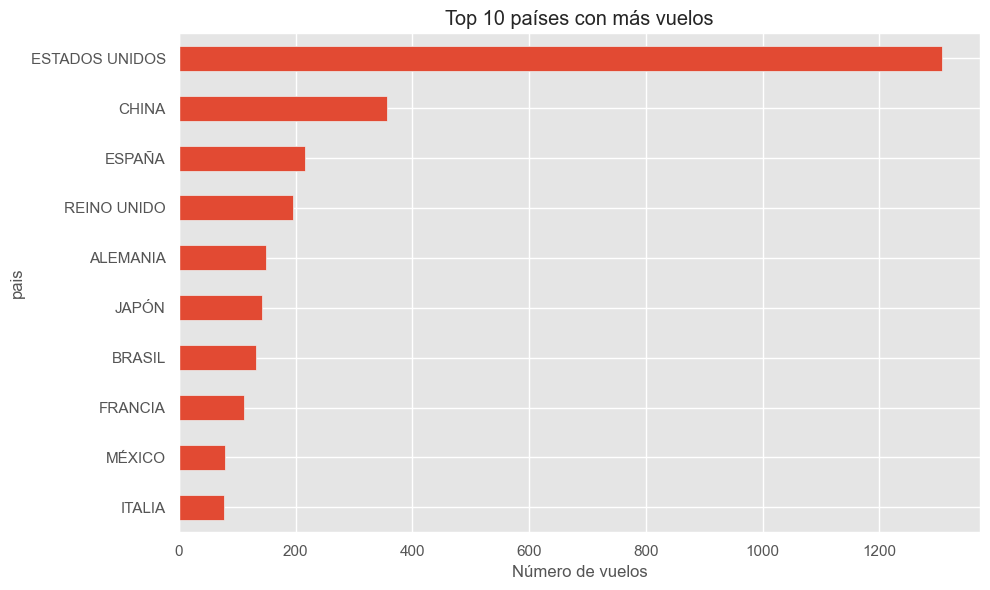

In [106]:
# Contar vuelos por país (con datos turísticos)
vuelos_por_pais = vuelos_completo[vuelos_completo['llegadas_turistas'].notnull()] \
    .groupby('pais')['ident'].count().sort_values(ascending=False).head(10)

# Visualizar
vuelos_por_pais.plot(kind='barh', figsize=(10,6), title='Top 10 países con más vuelos')
plt.xlabel("Número de vuelos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Llegadas de turista / número de vuelos

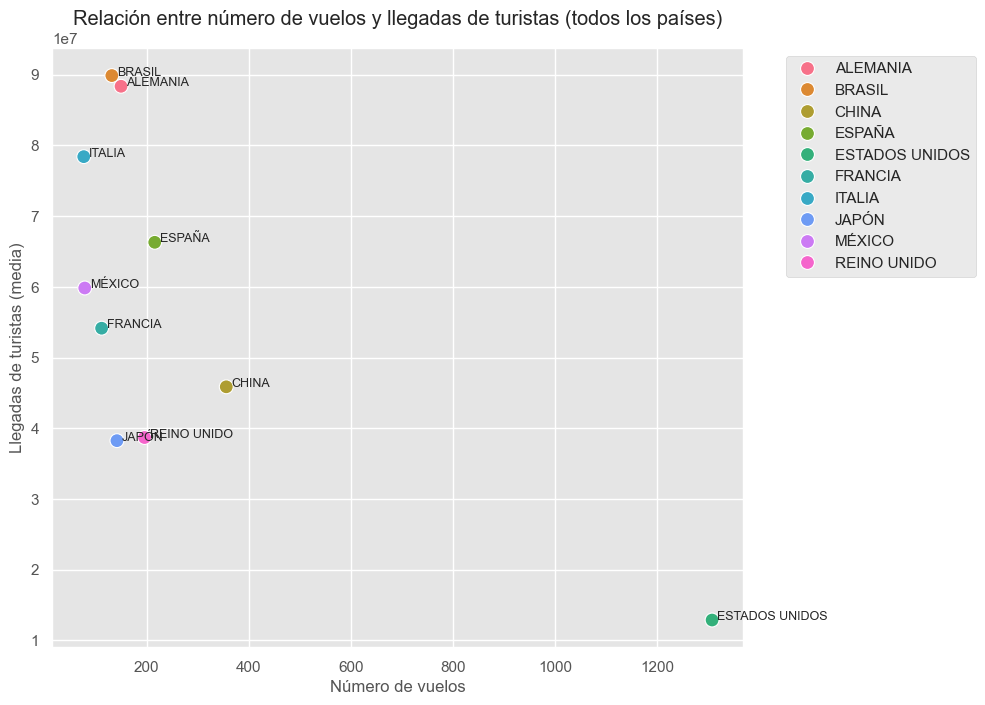

In [121]:
# Reset index para mantener 'pais' como columna
agrupado_reset = agrupado.reset_index()

# Crear el scatterplot con color por país
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=agrupado_reset,
    x='n_vuelos',
    y='llegadas_turistas',
    hue='pais',
    s=100
)

# Añadir etiquetas de país a cada punto
for i in range(len(agrupado_reset)):
    plt.text(
        x=agrupado_reset['n_vuelos'][i] + 10,
        y=agrupado_reset['llegadas_turistas'][i],
        s=agrupado_reset['pais'][i],
        fontsize=9
    )

plt.title("Relación entre número de vuelos y llegadas de turistas (todos los países)")
plt.xlabel("Número de vuelos")
plt.ylabel("Llegadas de turistas (media)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [123]:
agrupado.corr()

,n_vuelos,llegadas_turistas
n_vuelos,1.000000,-0.685662
llegadas_turistas,-0.685662,1.000000


### Para paises turísticos

In [124]:
# Filtrar países con más de 30 millones de turistas (en promedio)
agrupado_filtrado = agrupado[agrupado['llegadas_turistas'] > 50_000_000]


In [125]:
# Calcular correlación solo en países turísticos
correlacion_turisticos = agrupado_filtrado.corr()
print(correlacion_turisticos)


                   n_vuelos  llegadas_turistas
n_vuelos           1.000000           0.124736
llegadas_turistas  0.124736           1.000000


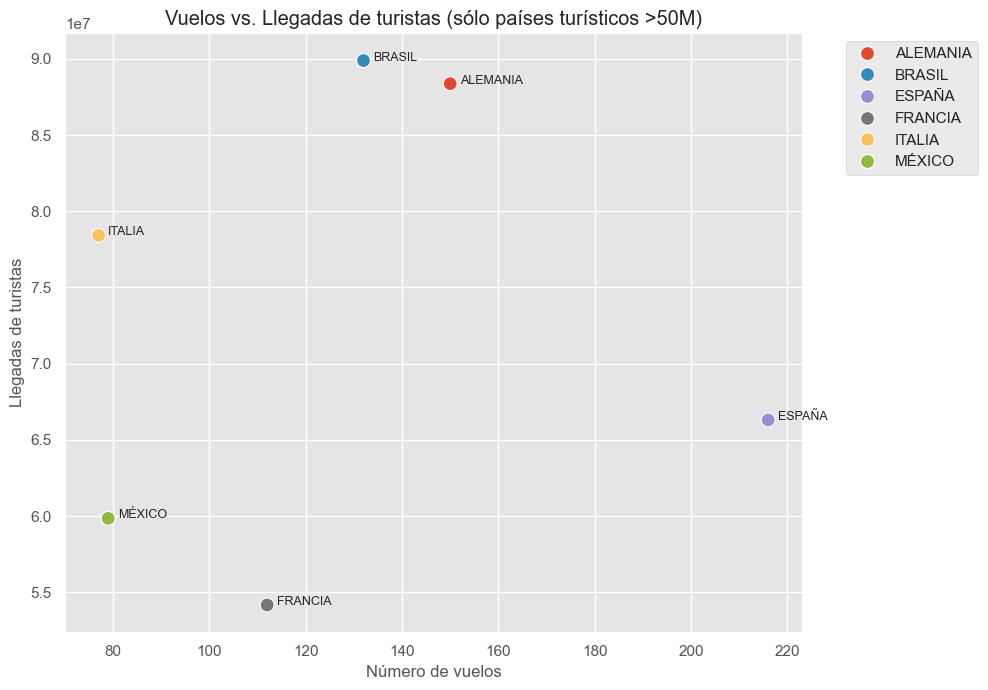

In [126]:
# Agregar columna de país para usar como hue
agrupado_filtrado = agrupado[agrupado['llegadas_turistas'] > 50_000_000].reset_index()

# Crear scatterplot con etiquetas y colores por país
plt.figure(figsize=(10, 7))
sns.scatterplot(data=agrupado_filtrado, x='n_vuelos', y='llegadas_turistas', hue='pais', s=100)

# Añadir etiquetas de país a cada punto
for i in range(len(agrupado_filtrado)):
    plt.text(
        x=agrupado_filtrado['n_vuelos'][i] + 2,
        y=agrupado_filtrado['llegadas_turistas'][i],
        s=agrupado_filtrado['pais'][i],
        fontsize=9
    )

plt.title("Vuelos vs. Llegadas de turistas (sólo países turísticos >50M)")
plt.xlabel("Número de vuelos")
plt.ylabel("Llegadas de turistas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Duración media de vuelos por país 

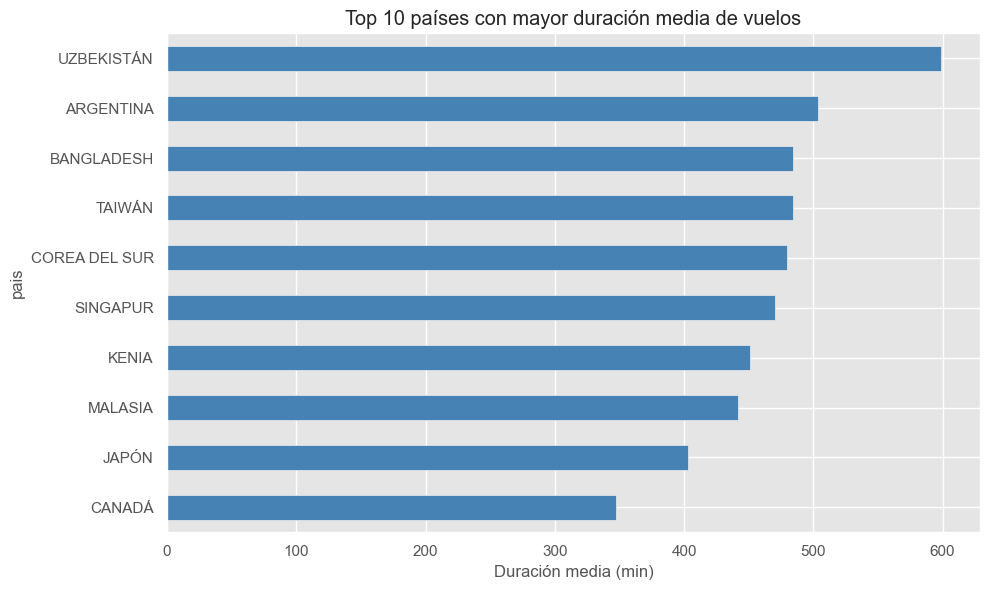

In [127]:
# Asegurarse de que 'duración (min)' es numérico
vuelos_completo['duración (min)'] = pd.to_numeric(vuelos_completo['duración (min)'], errors='coerce')

# Filtrar valores con duración lógica (positiva y menor a 1000 min)
vuelos_validos = vuelos_completo[
    (vuelos_completo['duración (min)'] > 0) & 
    (vuelos_completo['duración (min)'] < 1000)
]

# Agrupar y ordenar por duración media
duracion_media = vuelos_validos.groupby('pais')['duración (min)'].mean().sort_values(ascending=False).head(10)

# Gráfico mejorado
plt.figure(figsize=(10,6))
duracion_media.plot(kind='barh', color='steelblue')
plt.title('Top 10 países con mayor duración media de vuelos')
plt.xlabel('Duración media (min)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### Ingresos Turísticos por Paises con más vuelos 

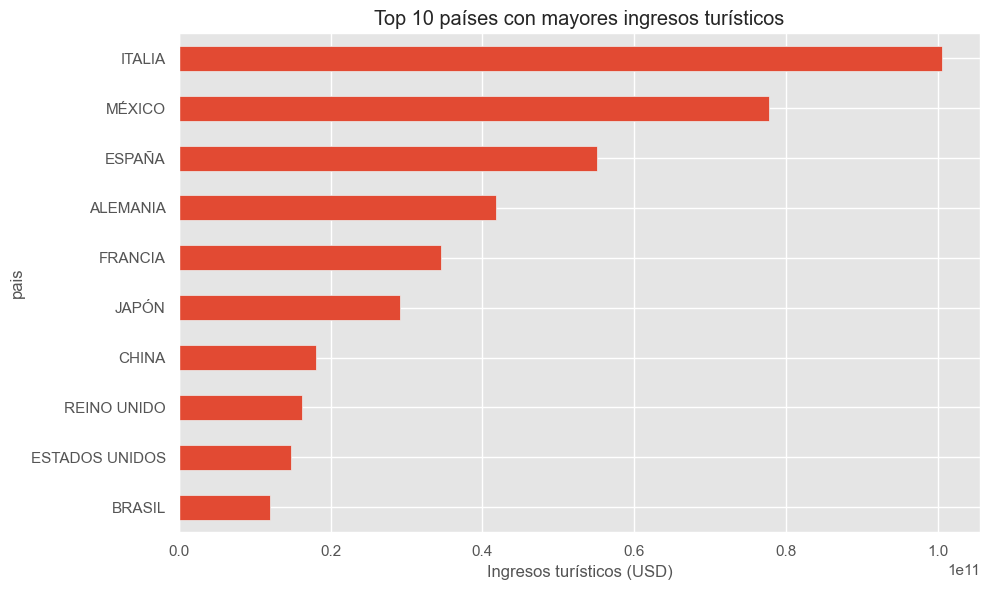

In [109]:
# Ingresos turísticos promedio en países con más vuelos
ingresos = vuelos_completo[vuelos_completo['llegadas_turistas'].notnull()] \
    .groupby('pais')['ingresos_turisticos_usd'].mean().sort_values(ascending=False).head(10)

ingresos.plot(kind='barh', figsize=(10,6), title='Top 10 países con mayores ingresos turísticos')
plt.xlabel("Ingresos turísticos (USD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Tabla Resumen 

In [128]:
# Asegurarse de que la duración es válida
vuelos_completo['duración (min)'] = pd.to_numeric(vuelos_completo['duración (min)'], errors='coerce')
vuelos_validos = vuelos_completo[(vuelos_completo['duración (min)'] > 0) & (vuelos_completo['duración (min)'] < 1000)]

# Agrupar todos los indicadores por país
tabla_resumen = vuelos_validos.groupby('pais').agg({
    'ident': 'count',
    'llegadas_turistas': 'mean',
    'ingresos_turisticos_usd': 'mean',
    'duración (min)': 'mean'
}).rename(columns={
    'ident': 'n_vuelos',
    'llegadas_turistas': 'llegadas_medias',
    'ingresos_turisticos_usd': 'ingresos_medios',
    'duración (min)': 'duracion_media'
})

# Redondear para presentación
tabla_resumen = tabla_resumen.round({
    'llegadas_medias': 0,
    'ingresos_medios': 0,
    'duracion_media': 1
})

# Filtrar solo países con datos turísticos completos
tabla_resumen = tabla_resumen.dropna().sort_values(by='ingresos_medios', ascending=False).head(10)

# Mostrar tabla
print(tabla_resumen)


                n_vuelos  llegadas_medias  ingresos_medios  duracion_media
pais                                                                      
ITALIA                73       78422991.0     1.005657e+11           202.9
MÉXICO                30       59847136.0     7.775973e+10           281.6
ESPAÑA               166       66306900.0     5.515891e+10           154.1
ALEMANIA             124       88375337.0     4.183859e+10           159.7
FRANCIA               95       54160571.0     3.456790e+10           175.3
JAPÓN                 49       38255876.0     2.916186e+10           403.1
CHINA                211       45869792.0     1.812132e+10           232.3
REINO UNIDO          142       38698788.0     1.617943e+10           237.7
ESTADOS UNIDOS      1115       12887739.0     1.473119e+10           282.9
BRASIL               122       89890726.0     1.207100e+10           178.7


# Clustering

c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janto\AppData\Local\Temp\ipykernel_16616\855871313.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_cluster['PCA1'][i]+0.02, data_cluster['PCA2'][i], data_cluster.index[i], fontsize=9)


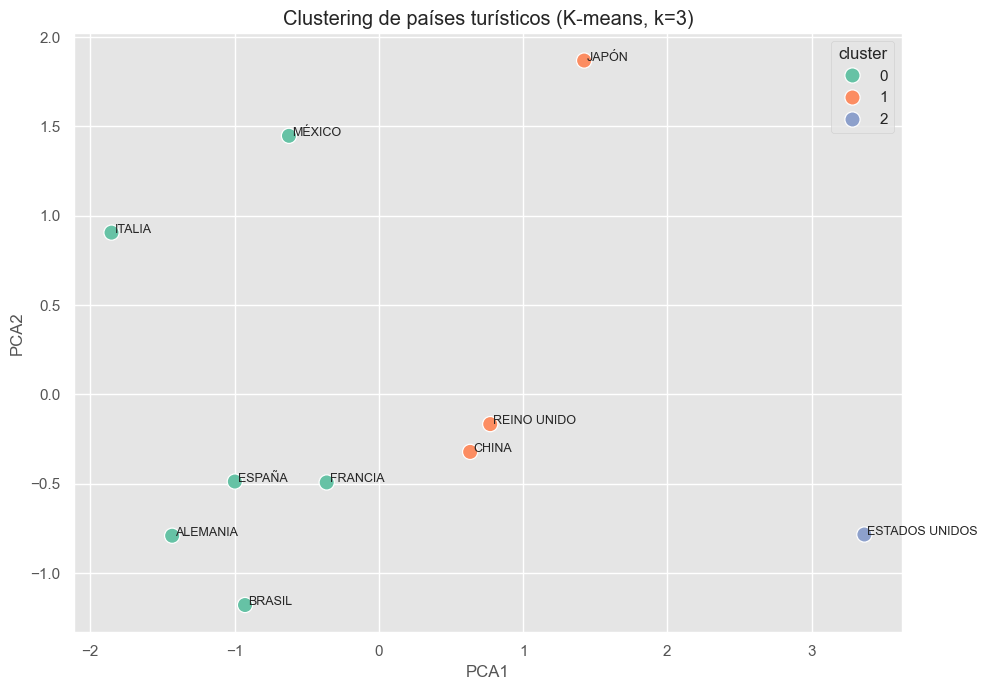

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Usar tabla_resumen (debe estar generada previamente)
data_cluster = tabla_resumen.copy()

# 2. Escalar los datos numéricos
features = ['n_vuelos', 'llegadas_medias', 'ingresos_medios', 'duracion_media']
scaler = StandardScaler()
X = scaler.fit_transform(data_cluster[features])

# 3. Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_cluster['cluster'] = kmeans.fit_predict(X)

# 4. PCA para visualizar en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

data_cluster['PCA1'] = X_pca[:, 0]
data_cluster['PCA2'] = X_pca[:, 1]

# 5. Visualización
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_cluster, x='PCA1', y='PCA2', hue='cluster', s=120, palette='Set2')
for i in range(len(data_cluster)):
    plt.text(data_cluster['PCA1'][i]+0.02, data_cluster['PCA2'][i], data_cluster.index[i], fontsize=9)
plt.title('Clustering de países turísticos (K-means, k=3)')
plt.tight_layout()
plt.show()



c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

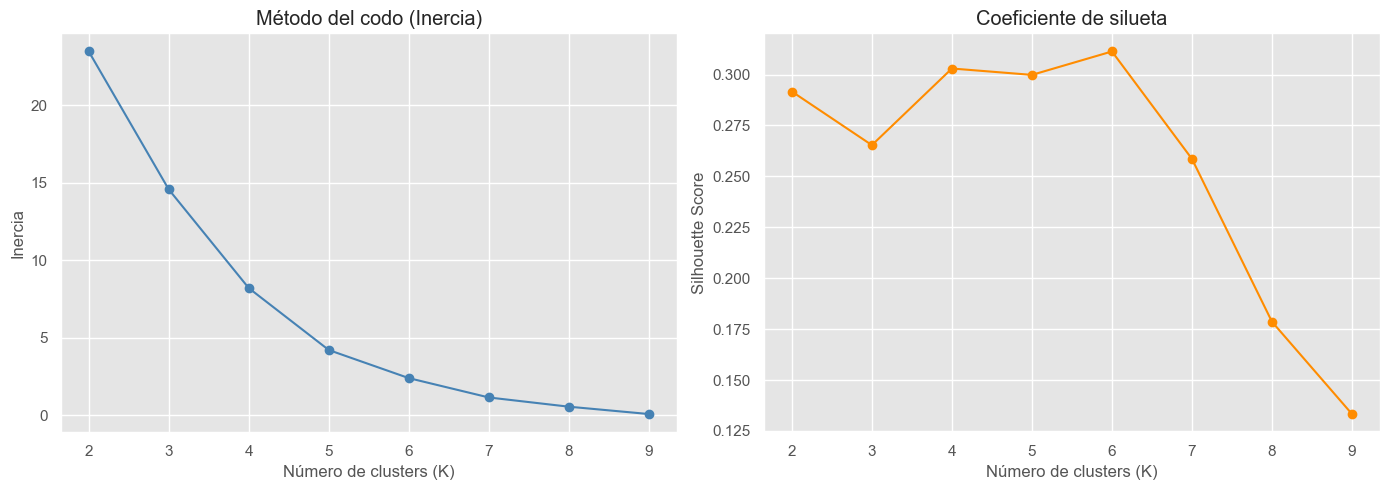

In [134]:
from sklearn.metrics import silhouette_score

# Rango de valores de K a probar
ks = range(2, 10)
inertias = []
silhouette_scores = []

# Escalar datos
X = scaler.fit_transform(data_cluster[features])

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Graficar curva del codo
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, 'o-', color='steelblue')
plt.title("Método del codo (Inercia)")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")

# Graficar silueta
plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, 'o-', color='darkorange')
plt.title("Coeficiente de silueta")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\janto\AppData\Local\Temp\ipykernel_16616\2342367078.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_cluster['PCA1'][i]+0.02, data_cluster['PCA2'][i], data_cluster.index[i], fontsize=9)


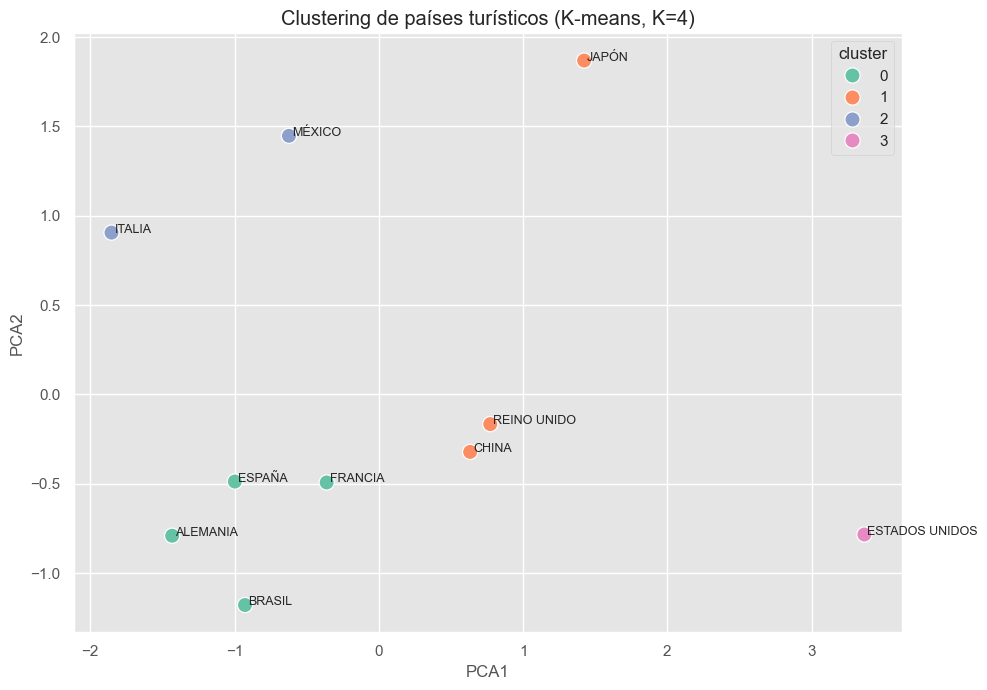

In [137]:
# Asegúrate de tener 'tabla_resumen' previamente creada
data_cluster = tabla_resumen.copy()

# Variables a usar
features = ['n_vuelos', 'llegadas_medias', 'ingresos_medios', 'duracion_media']

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(data_cluster[features])

# KMeans con K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data_cluster['cluster'] = kmeans.fit_predict(X)

# PCA para visualización 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data_cluster['PCA1'] = X_pca[:, 0]
data_cluster['PCA2'] = X_pca[:, 1]

# Visualización
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_cluster, x='PCA1', y='PCA2', hue='cluster', s=120, palette='Set2')
for i in range(len(data_cluster)):
    plt.text(data_cluster['PCA1'][i]+0.02, data_cluster['PCA2'][i], data_cluster.index[i], fontsize=9)
plt.title('Clustering de países turísticos (K-means, K=4)')
plt.tight_layout()
plt.show()


C:\Users\janto\AppData\Local\Temp\ipykernel_16616\100157367.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(data_cluster['MDS1'][i]+0.01, data_cluster['MDS2'][i], data_cluster.index[i], fontsize=9)


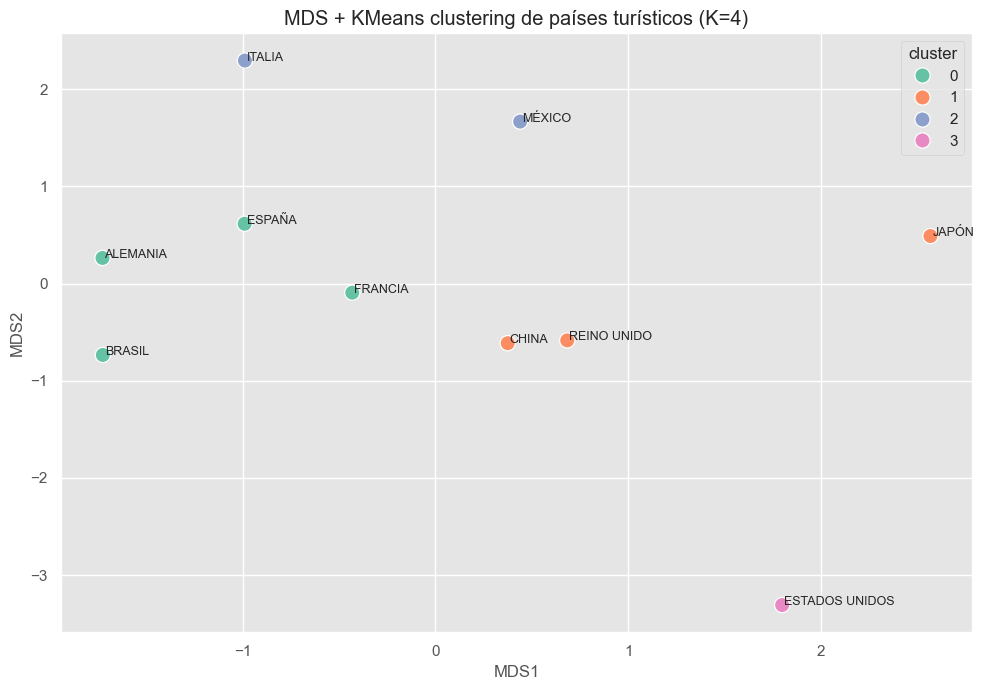

In [138]:
from sklearn.manifold import MDS

# MDS sobre los datos ya escalados
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
X_mds = mds.fit_transform(X)

# Insertar las coordenadas en el dataframe
data_cluster['MDS1'] = X_mds[:, 0]
data_cluster['MDS2'] = X_mds[:, 1]

# Visualizar en 2D usando MDS
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_cluster, x='MDS1', y='MDS2', hue='cluster', s=120, palette='Set2')
for i in range(len(data_cluster)):
    plt.text(data_cluster['MDS1'][i]+0.01, data_cluster['MDS2'][i], data_cluster.index[i], fontsize=9)
plt.title("MDS + KMeans clustering de países turísticos (K=4)")
plt.tight_layout()
plt.show()


### Análisis 2 

In [139]:
# Copiar y calcular nuevos indicadores
eficiencia = tabla_resumen.copy()

eficiencia['turistas_por_vuelo'] = eficiencia['llegadas_medias'] / eficiencia['n_vuelos']
eficiencia['usd_por_vuelo'] = eficiencia['ingresos_medios'] / eficiencia['n_vuelos']
eficiencia['usd_por_minuto'] = eficiencia['ingresos_medios'] / (eficiencia['n_vuelos'] * eficiencia['duracion_media'])

# Redondear
eficiencia = eficiencia.round(2)

# Ordenar por ingresos por minuto de vuelo
eficiencia_ordenada = eficiencia.sort_values(by='usd_por_minuto', ascending=False)

# Mostrar los 10 países más eficientes
print(eficiencia_ordenada[['turistas_por_vuelo', 'usd_por_vuelo', 'usd_por_minuto']].head(10))


                turistas_por_vuelo  usd_por_vuelo  usd_por_minuto
pais                                                             
MÉXICO                  1994904.53   2.591991e+09      9204514.00
ITALIA                  1074287.55   1.377612e+09      6789611.89
ESPAÑA                   399439.16   3.322826e+08      2156279.04
ALEMANIA                 712704.33   3.374080e+08      2112761.34
FRANCIA                  570111.27   3.638727e+08      2075714.02
JAPÓN                    780732.16   5.951400e+08      1476407.92
BRASIL                   736809.23   9.894263e+07       553680.08
REINO UNIDO              272526.68   1.139396e+08       479342.18
CHINA                    217392.38   8.588302e+07       369707.36
ESTADOS UNIDOS            11558.51   1.321183e+07        46701.41


## Eficiencia turística aérea 

In [146]:
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
# Crear nuevo DataFrame con solo las métricas de eficiencia
clustering_eficiencia = eficiencia[['turistas_por_vuelo', 'usd_por_vuelo', 'usd_por_minuto']].copy()

# Escalado
scaler = StandardScaler()
X_eff = scaler.fit_transform(clustering_eficiencia)

### KMeans

In [148]:
# KMeans (puedes ajustar K según Elbow/Silhouette)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_eff)

c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [149]:
# Métricas
sil_kmeans = silhouette_score(X_eff, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X_eff, kmeans_labels)
db_kmeans = davies_bouldin_score(X_eff, kmeans_labels)

print("KMeans (K=4):")
print(f"  Silhouette Score: {sil_kmeans:.3f}")
print(f"  Calinski-Harabasz Index: {calinski_kmeans:.2f}")
print(f"  Davies-Bouldin Index: {db_kmeans:.3f}")

KMeans (K=4):
  Silhouette Score: 0.435
  Calinski-Harabasz Index: 61.99
  Davies-Bouldin Index: 0.328


### Visualización KMeans 

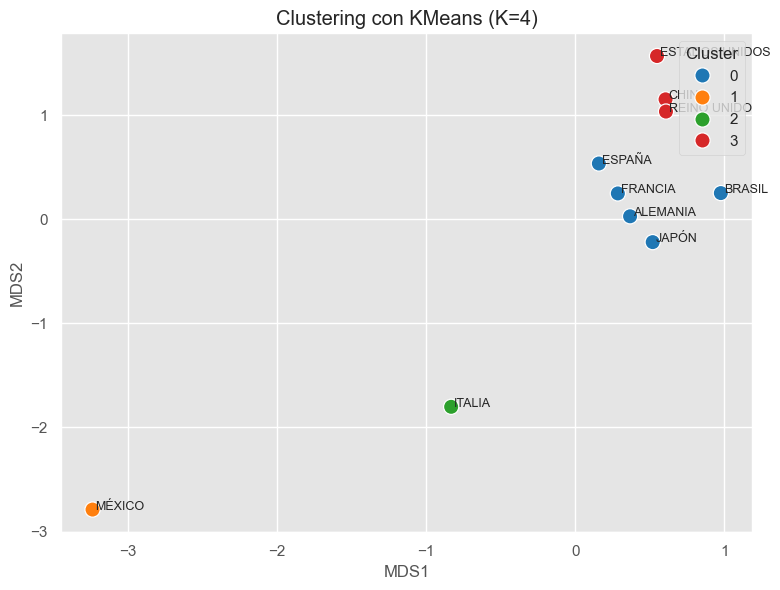

In [151]:
# MDS + visualización
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_eff)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=kmeans_labels, palette='tab10', s=120)
for i, pais in enumerate(clustering_eficiencia.index):
    plt.text(X_mds[i,0]+0.02, X_mds[i,1], pais, fontsize=9)
plt.title("Clustering con KMeans (K=4)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### Clustering Aglomerativo 

In [160]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [167]:
# Recalcular Agglomerative Clustering con K=4
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_eff)


In [164]:
# 2. Métricas del clustering aglomerativo
sil = silhouette_score(X_eff, agglo_labels)
calinski = calinski_harabasz_score(X_eff, agglo_labels)
db = davies_bouldin_score(X_eff, agglo_labels)

print("AgglomerativeClustering (K=4):")
print(f"  Silhouette Score: {sil:.3f}")
print(f"  Calinski-Harabasz Index: {calinski:.2f}")
print(f"  Davies-Bouldin Index: {db:.3f}")

AgglomerativeClustering (K=4):
  Silhouette Score: 0.545
  Calinski-Harabasz Index: 30.44
  Davies-Bouldin Index: 0.185


### Visualización

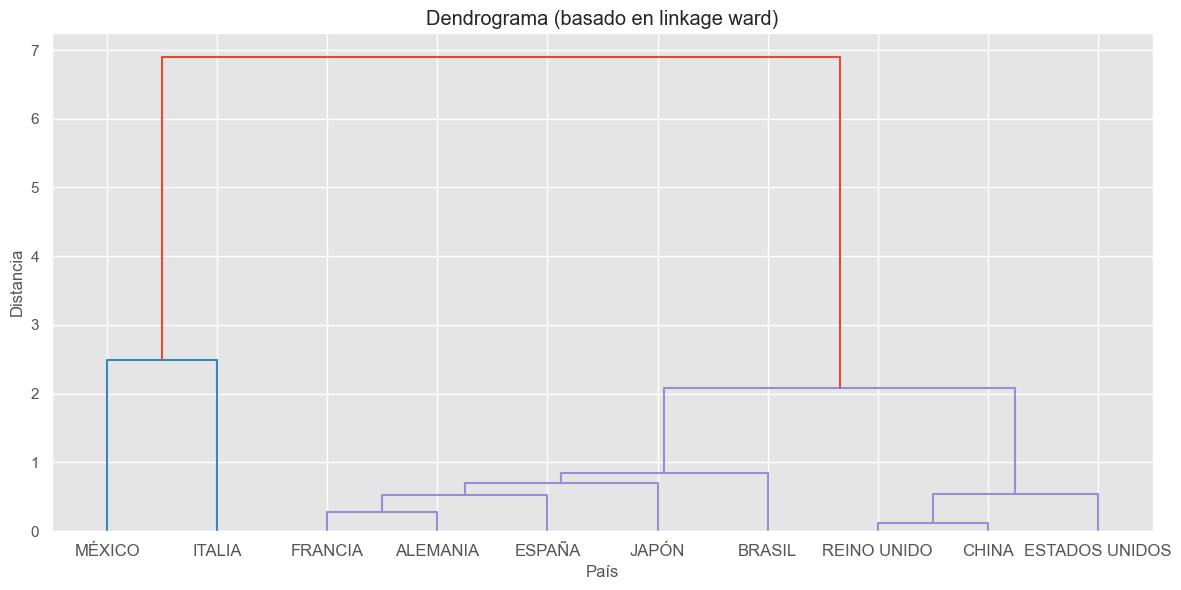

In [165]:
linked = linkage(X_eff, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=clustering_eficiencia.index.tolist(),
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrograma (basado en linkage ward)")
plt.xlabel("País")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

### DBSCAN 

In [168]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
dbscan = DBSCAN(eps=0.7, min_samples=1)
db_labels = dbscan.fit_predict(X_eff)

In [191]:
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

sil_db = silhouette_score(X_eff, db_labels)
cal_db = calinski_harabasz_score(X_eff, db_labels)
db_db = davies_bouldin_score(X_eff, db_labels)

print("DBSCAN:")
print(f"  Número de clusters: {n_clusters}")
print(f"  Silhouette Score: {sil_db:.3f}")
print(f"  Calinski-Harabasz Index: {cal_db:.2f}")
print(f"  Davies-Bouldin Index: {db_db:.3f}")

DBSCAN:
  Número de clusters: 3
  Silhouette Score: 0.545
  Calinski-Harabasz Index: 30.44
  Davies-Bouldin Index: 0.185


### Visualización 

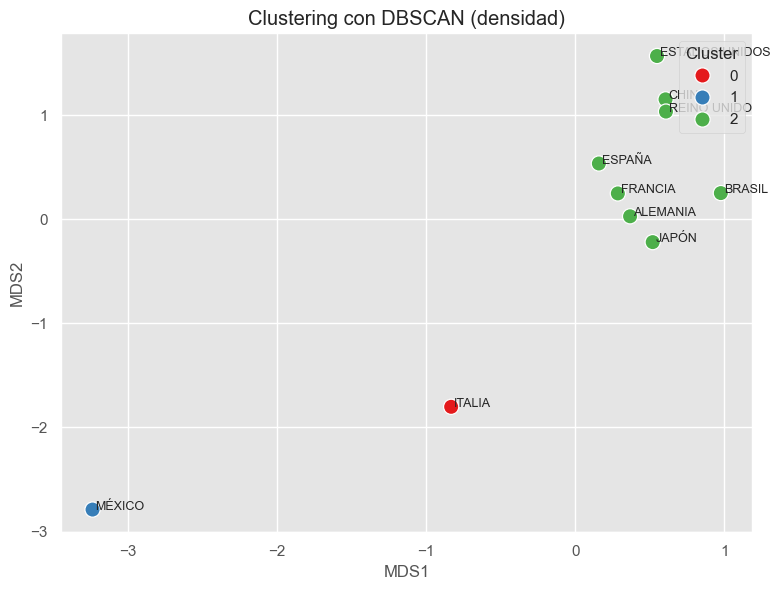

In [192]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_eff)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=db_labels, palette='Set1', s=120)
for i, pais in enumerate(clustering_eficiencia.index):
    plt.text(X_mds[i,0]+0.02, X_mds[i,1], pais, fontsize=9)
plt.title("Clustering con DBSCAN (densidad)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()